In [10]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
)

from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

%matplotlib inline
%reload_ext nb_black


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
def plot_confusion_matrix(
    cm, target_names, title="Confusion matrix", cmap=None, normalize=True
):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap("Blues")

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(
                j,
                i,
                "{:0.4f}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )
        else:
            plt.text(
                j,
                i,
                "{:,}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel(
        "Predicted label\naccuracy={:0.4f}; misclass={:0.4f}".format(accuracy, misclass)
    )
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Load and prepare data

In [2]:
df_train_data = pd.read_csv("shuttle_data/shuttle.csv", sep=" ", header=None)

<IPython.core.display.Javascript object>

In [3]:
X = df_train_data.drop(columns=9)
X

,0,1,2,3,4,5,6,7,8
0,50,21,77,0,28,0,27,48,22
1,55,0,92,0,0,26,36,92,56
2,53,0,82,0,52,-5,29,30,2
3,37,0,76,0,28,18,40,48,8
4,37,0,79,0,34,-26,43,46,2
...,...,...,...,...,...,...,...,...,...
43495,46,5,78,0,46,5,32,32,0
43496,37,0,79,-1,10,3,43,69,26
43497,48,0,78,3,46,0,30,32,2
43498,41,0,79,0,38,-25,38,40,2


<IPython.core.display.Javascript object>

In [4]:
y = pd.DataFrame(df_train_data[9])
y["class"] = 0
y.loc[y[9] != 1, "class"] = 1
y = y.drop(columns=9)
y = np.ravel(y)
y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

<IPython.core.display.Javascript object>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<IPython.core.display.Javascript object>

# Create the Model

In [6]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [7]:
y_train

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

<IPython.core.display.Javascript object>

In [8]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

# Calculate Accuracy

In [9]:
print(
    "The train accuracy of this model fit is {}".format(model.score(X_train, y_train))
)

print("The train accuracy of this model fit is {}".format(model.score(X_test, y_test)))

The train accuracy of this model fit is 0.9681609195402299
The train accuracy of this model fit is 0.9679310344827586


<IPython.core.display.Javascript object>

# Dummy Classifier

In [15]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
print(
    "The dummy accuracy of this model fit is {}".format(dummy_clf.score(X_test, y_test))
)

The dummy accuracy of this model fit is 0.7859770114942529


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Confusion Matrix

In [18]:
y_pred = model.predict(X_test)
lr_cm = confusion_matrix(y_test, y_pred)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

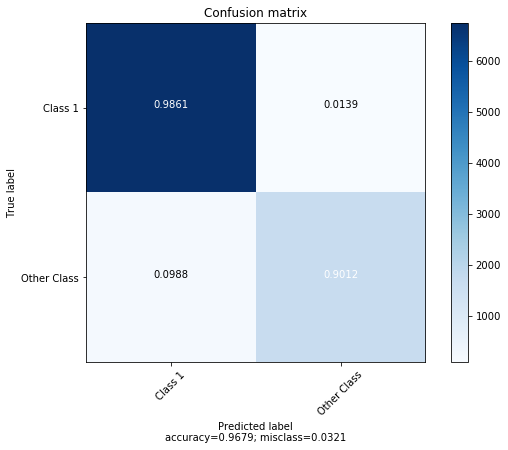

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
plot_confusion_matrix(lr_cm, target_names=["Class 1", "Other Class"])

# Metrics

* F1
* F Beta
* Precision
* Recall
* Accuracy

In [23]:
tp, fp, tn, fn = lr_cm.ravel()

accuracy = tp


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6743

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>